# Graficos de la tesis

En esta notebook se levantan los datasets de la tesis y se hacen graficas.

In [3]:
# Librerias necesarias
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import itertools
from math import log

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

## Datasets

In [4]:
# Levantar en este dict los datasets
datasets = {}

In [5]:
# Speedups
datasets['speedup'] = [4, 8, 16, 24]
datasets['Lineal'] = [4, 8, 16, 24]
datasets['speedups'] = {"BL-CC": {}, "BL-SC": {}, "BM-CC": {}, "BM-SC": {}}

## BL-CC
datasets['speedups']['BL-CC']['C1'] = [0.969, 2.346, 4.877, 8.104]
datasets['speedups']['BL-CC']['C2'] = [0.948, 2.398, 5.093, 7.645]
datasets['speedups']['BL-CC']['C3'] = [np.nan, 2.326, 5.249, 8.054]

## BL-SC
datasets['speedups']['BL-SC']['C1'] = [0.969, 2.316, 5.079, 8.194]
datasets['speedups']['BL-SC']['C2'] = [0.951, 2.360, 5.195, 7.917]
datasets['speedups']['BL-SC']['C3'] = [np.nan, 2.305, 5.227, 7.958]

## BM-CC
datasets['speedups']['BM-CC']['C1'] = [0.978, 2.385, 5.105, 8.385]
datasets['speedups']['BM-CC']['C2'] = [0.944, 2.332, 5.184, 7.673]
datasets['speedups']['BM-CC']['C3'] = [np.nan, 2.464, 5.466, 8.235]

## BM-SC
datasets['speedups']['BM-SC']['C1'] = [0.975, 2.289, 5.123, 8.146]
datasets['speedups']['BM-SC']['C2'] = [0.943, 2.337, 5.200, 7.773]
datasets['speedups']['BM-SC']['C3'] = [np.nan, 2.288, 5.148, 7.749]


## Variables globales

In [6]:
colort = ("r","g","b","y")
markers = ('+', 'o', '^')
#marker = itertools.cycle((',', '+', '.', 'o', '*'))
marker = itertools.cycle(markers)
colors = itertools.cycle(colort)

serieParams = {# Colecciones
               'C1': {'color': 'r', 'marker': '+'},
               'C2': {'color': 'g', 'marker': 'o'},
               'C3': {'color': 'b', 'marker': '^'},
               # Lineal
               'Lineal': {'color': 'y', 'marker': '*'},
               # Experimentos
               'BL-SC': {'color': 'r', 'marker': '+'},
               'BL-CC': {'color': 'g', 'marker': 'o'},
               'BM-SC': {'color': 'b', 'marker': '^'},
               'BM-CC': {'color': 'y', 'marker': '*'}, }

def getColor(serieName):
    global serieParams
    return serieParams[serieName]["color"]

def getMarker(serieName):
    global serieParams
    return serieParams[serieName]["marker"]


## Funciones generales

In [7]:
def loadDataset(datasetPath):
    """Levanta un archivo csv y retorna su header y datos en un recordset"""
    dataset = []
    with open(datasetPath) as filedata:
        reader = csv.DictReader(filedata, delimiter='\t')
        #reader = csv.reader(filedata, delimiter='\t')
        for row in reader:
            dataset += [row]
    return dataset[0], dataset[1:]

In [8]:
def getValueFromIndex(nombre, indice):
    """Retorna el valor de un campo del nombre de experimento a partir del indice solicitado"""
    return nombre.split('-')[indice]

In [9]:
def agruparPorIndice(dataset, indice):
    """Toma un dataset cargado y lo divide en listas a partir de un valor del nombre de experimentos"""
    grupos = {}
    for registro in dataset:
        grupo = getValueFromIndex(registro["Experimento"], indice)

        if grupo not in grupos:
            grupos[grupo] = []
        
        if len(registro["Tiempo"]) > 0:
            grupos[grupo] += [float(registro["Tiempo"])]
    return grupos

In [10]:
def crearDict(rawDataset):
    """Crea un diccionario iterable a partir del dataset"""
    dic = {}

# Main

## Indices

```
 1 2  3  4  5  6
BL B CC 4N 2R C1
```

## Tiempos

Dataset de tiempos:

### BL-SC

### BL-CC

| Experimento | C1        | C2        | C3        |
|-------------|-----------|-----------|-----------|
| 0N-1R       | 26011.193 | 52950.164 | 80507.467 |
| 1N-1R       | 26838.776 | 55844.728 | S/D       |
| 2N-1R       | 11207.308 | 22709.396 | 34612.986 |
| 2N-2R       | 11087.425 | 22085.329 | 39818.040 |
| 4N-1R       | 6572.095  | 13159.986 | 21100.789 |
| 4N-2R       | 5434.703  | 10694.047 | 16879.659 |
| 4N-4R       | 5333.012  | 10396.146 | 15337.024 |
| 6N-1R       | 5546.969  | 14595.622 | 23249.55  |
| 6N-2R       | 4376.344  | 7986.715  | 17520.411 |
| 6N-4R       | 3420.484  | 6926.291  | 9995.482  |
| 6N-6R       | 3209.768  | 7068.320  | 12899.832 |

### BM-SC

### BM-CC

In [31]:
def graficarDataset(ds, onlyTrend=False):
    nombreSerieX = ds.get('seriex')
    if nombreSerieX and nombreSerieX in ds['series']:
        # Caso 1: Hay una serie x para graficar
        x = np.array(ds['series'][nombreSerieX]).astype(np.double)
        xrange = np.arange(min(ds['series'][nombreSerieX]), max(ds['series'][nombreSerieX]), 0.001)
    elif 'xvalues' in ds:
        # Caso 2: Hay un rango de valores en el eje x pero no es una serie
        xvalues = ds['xvalues']
        x = np.array(xvalues).astype(np.double)
        xrange = np.arange(min(xvalues), max(xvalues), 0.001)
    else:
        # Caso 3: Armar el eje x en base a los labels del mismo
        x = np.arange(len(ds['labels']))
    if 'rotation' in ds:
        rotation = ds['rotation']
    else:
        rotation = None
    plt.xticks(x, ds['labels'], rotation=rotation)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for nombre, serie in sorted(ds['series'].items()):
        serieFinal = np.array(serie).astype(np.double)
        serieMask = np.isfinite(serieFinal)
        color = getColor(nombre)
        marker = getMarker(nombre)
        if 'ylim' in ds:
            axes = plt.gca()
            #axes.set_xlim([xmin,xmax])
            axes.set_ylim(ds['ylim'])
        # Indica si solo se quieren graficar las lineas de tendencia o no
        if not onlyTrend:
            plt.plot(x[serieMask], serieFinal[serieMask], marker=marker, label=nombre, color=color)
        # Si se pide linea de tendencia
        if('trend' in ds and nombre in ds['trend']):
            ytrend = []
            #xrange = ds['series'][nombreSerieX]
            for xtrend in xrange:
                ytrend.append(ds['trend'][nombre]['equation'](xtrend))
            if 'label' in ds['trend'][nombre]:
                label = ds['trend'][nombre]['label']
            else:
                label = 'Trend '+nombre
            plt.plot(xrange, ytrend, label=label, color=color, linestyle='--')
    plt.legend(loc=ds['legendLoc'])
    plt.xlabel(ds['xlabel'])
    plt.ylabel(ds['ylabel'])
    if 'titulo' in ds:
        plt.title(ds['titulo'])
    plt.show()

In [32]:
# Datasets de tiempos:
dsTiempos = {'BL-SC': {}, 'BL-CC': {}, 'BM-SC': {}, 'BM-CC': {}}

# Campos comunes
#tituloPrefix = "Tiempos de Construcción de índice \n"
tituloPrefix = ""
labels = ['0N-1R', '1N-1R', '2N-1R', '2N-2R', '4N-1R', '4N-2R', '4N-4R', '6N-1R', '6N-2R', '6N-4R', '6N-6R']
legendLoc = 1
xlabel = "Cluster Setup (Nodos y Reducers por experimento)"
ylabel = "Tiempo (segundos)"
rotation = 35

## BL - SC
experimento = 'BL-SC'
#dsTiempos[experimento]['titulo'] = tituloPrefix + " Baseline Sin Compresion (BL-SC)"
dsTiempos[experimento]['labels'] = labels
dsTiempos[experimento]['legendLoc'] = legendLoc
dsTiempos[experimento]['xlabel'] = xlabel
dsTiempos[experimento]['ylabel'] = ylabel
dsTiempos[experimento]['rotation'] = rotation
dsTiempos[experimento]['series'] = {}
dsTiempos[experimento]['series']['C1'] = [26137.368, 26976.092, 11454.042, 11285.692, 6653.891, 5448.491, 5146.407, 5837.719, 4041.535, 3418.497, 3189.933]
dsTiempos[experimento]['series']['C2'] = [53324.642, 56062.717, 22764.499, 22598.283, 13283.612, 10754.403, 10264.901, 11668.007, 7864.134, 6735.543, 7080.187]
dsTiempos[experimento]['series']['C3'] = [80209.510, None, 34797.463, 39899.306, 21063.882, 23219.713, 15343.850, 19210.043, 12612.234, 10078.965, 12717.231]

## BL - CC
experimento = 'BL-CC'
#dsTiempos[experimento]['titulo'] = tituloPrefix + " Baseline Con Compresion (BL-CC)"
dsTiempos[experimento]['labels'] = labels
dsTiempos[experimento]['legendLoc'] = legendLoc
dsTiempos[experimento]['xlabel'] = xlabel
dsTiempos[experimento]['ylabel'] = ylabel
dsTiempos[experimento]['rotation'] = rotation
dsTiempos[experimento]['series'] = {}
dsTiempos[experimento]['series']['C1'] = [26011.193, 26838.776, 11207.308, 11087.425, 6572.095, 5434.703, 5333.012, 5546.969, 4376.344, 3420.484, 3209.768]
dsTiempos[experimento]['series']['C2'] = [52950.164, 55844.728, 22709.396, 22085.329, 13159.986, 10694.047, 10396.146, 14595.622, 7986.715, 6926.291, 7068.320]
dsTiempos[experimento]['series']['C3'] = [80507.467, None, 34612.986, 39818.040, 21100.789, 16879.659, 15337.024, 23249.55, 17520.411, 9995.482, 12899.832]

## BM - SC
experimento = 'BM-SC'
#dsTiempos[experimento]['titulo'] = tituloPrefix + " Block-Max Sin Compresion (BM-SC)"
dsTiempos[experimento]['labels'] = labels
dsTiempos[experimento]['legendLoc'] = legendLoc
dsTiempos[experimento]['xlabel'] = xlabel
dsTiempos[experimento]['ylabel'] = ylabel
dsTiempos[experimento]['rotation'] = rotation
dsTiempos[experimento]['series'] = {}
dsTiempos[experimento]['series']['C1'] = [26366.853, 27053.689, 11597.016, 11518.062, 6762.284, 5554.556, 5147.026, 6134.251, 4159.241, 3523.757, 3236.844]
dsTiempos[experimento]['series']['C2'] = [53290.361, 56509.802, 23324.419, 22802.684, 13766.934, 10805.609, 10248.214, 12195.245, 7987.941, 6856.038, 6919.024]
dsTiempos[experimento]['series']['C3'] = [81060.354, None, 35429.034, 43994.824, 21994.637, 21969.412, 15745.185, 19834.939, 17157.718, 10460.787, 12981.668]

## BM - CC
experimento = 'BM-CC'
#dsTiempos[experimento]['titulo'] = tituloPrefix + " Block-Max Con Compresion (BM-CC)"
dsTiempos[experimento]['labels'] = labels
dsTiempos[experimento]['legendLoc'] = legendLoc
dsTiempos[experimento]['xlabel'] = xlabel
dsTiempos[experimento]['ylabel'] = ylabel
dsTiempos[experimento]['rotation'] = rotation
dsTiempos[experimento]['series'] = {}
dsTiempos[experimento]['series']['C1'] = [26486.421, 27073.788, 11230.281, 11104.052, 6628.732, 5488.190, 5188.618, 5645.735, 4086.059, 3409.284, 3158.890]
dsTiempos[experimento]['series']['C2'] = [53050.557, 56189.979, 22847.085, 22751.222, 13465.287, 10899.734, 10232.566, 11860.155, 7876.762, 6913.552, 7127.812]
dsTiempos[experimento]['series']['C3'] = [82702.670, None, 34881.028, 33558.136, 21214.401, 22327.590, 15129.476, 20008.918, 12293.151, 10043.419, 12359.091]


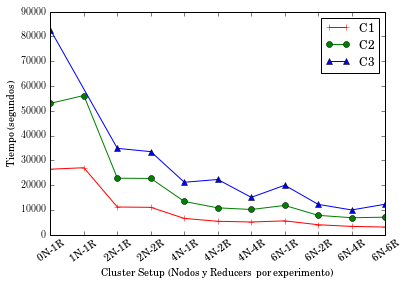

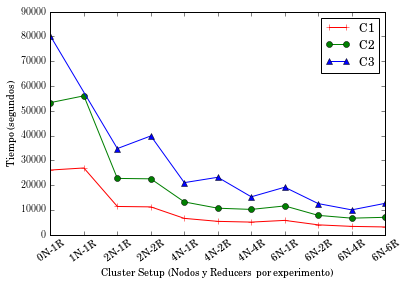

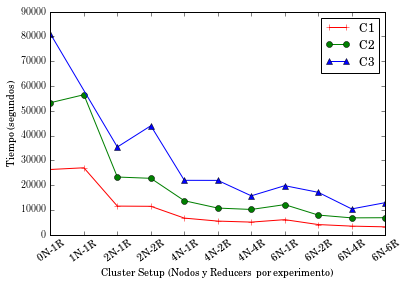

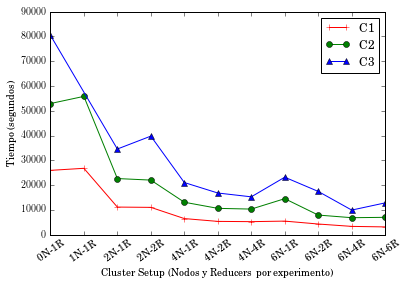

In [33]:
for experimento, dataset in dsTiempos.items():
    if dataset:
        graficarDataset(dataset)

In [34]:
def graficarDatasetBarras(ds):
    nombreSerieX = ds.get('seriex')
    if nombreSerieX and nombreSerieX in ds['series']:
        x = np.array(ds['series'][nombreSerieX]).astype(np.double)
    else:
        x = np.arange(len(ds['labels']))
    if 'rotation' in ds:
        rotation = ds['rotation']
    else:
        rotation = None
    plt.xticks(x, ds['labels'], rotation=rotation)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #fig, ax = plt.subplots()
    #ax.legends(ds['series'].keys())
    #fig.xticks(x, ds['labels'], rotation=rotation)
    #fig.tight_layout()
    usedLabels = []
    for xvalue in x:
        width = 0.2
        xserieoffset = [x for x in range(-int(len(ds['series'].keys())/2), int(len(ds['series'].keys())/2)+1)]
        for serie in sorted(ds['series'].keys())[::-1]:
            indice = sorted(list(ds['series'].keys()))[::-1].index(serie)
            if ds['series'][serie][xvalue]:
                if serie in usedLabels:
                    label = None
                else:
                    label = serie
                    usedLabels.append(serie)
                plt.bar(xvalue+(xserieoffset[indice]*width), ds['series'][serie][xvalue], color=getColor(serie), width=width, label=label)
            #fig.tight_layout()
            #plt.bar(xvalue, serieFinal[serieMask], color=next(colors))
    plt.legend(loc=ds['legendLoc'])
    plt.xlabel(ds['xlabel'])
    plt.ylabel(ds['ylabel'])
    if 'titulo' in ds:
        plt.title(ds['titulo'])
    plt.show()

In [15]:
def graficarDatasetBarras2(ds):
    nombreSerieX = ds.get('seriex')
    #if nombreSerieX and nombreSerieX in ds['series']:
    #    x = np.array(ds['series'][nombreSerieX]).astype(np.double)
    #else:
    x = np.arange(len(ds['labels']))
    if 'rotation' in ds:
        rotation = ds['rotation']
    else:
        rotation = None
    width = 0.2
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for serie in ds['series']:
        rects = ax.bar(x, serie, width, color='r')
    
    
    
    plt.xticks(x, ds['labels'], rotation=rotation)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #fig, ax = plt.subplots()
    #ax.legends(ds['series'].keys())
    #fig.xticks(x, ds['labels'], rotation=rotation)
    #fig.tight_layout()
    for xvalue in x:
        xserieoffset = [x for x in range(-int(len(ds['series'].keys())/2), int(len(ds['series'].keys())/2)+1)]
        for serie in ds['series'].keys():
            indice = list(ds['series'].keys()).index(serie)
            if ds['series'][serie][xvalue]:
                plt.bar(xvalue+(xserieoffset[indice]*width), ds['series'][serie][xvalue], color=colort[indice], width=width)
            #fig.tight_layout()
            #plt.bar(xvalue, serieFinal[serieMask], color=next(colors))
    plt.legend(loc=ds['legendLoc'])
    plt.xlabel(ds['xlabel'])
    plt.ylabel(ds['ylabel'])
    plt.title(ds['titulo'])
    plt.show()

BM-CC


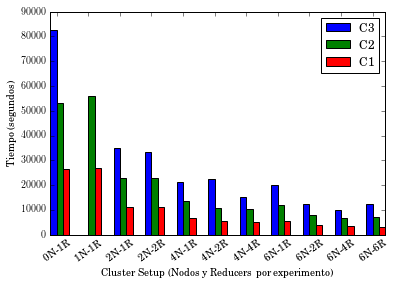

BL-SC


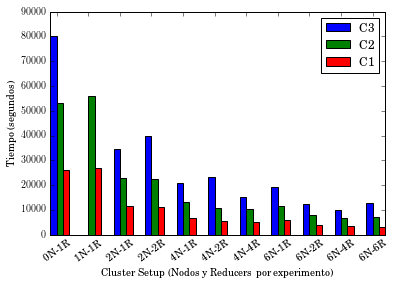

BM-SC


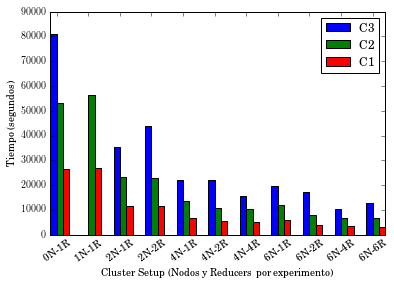

BL-CC


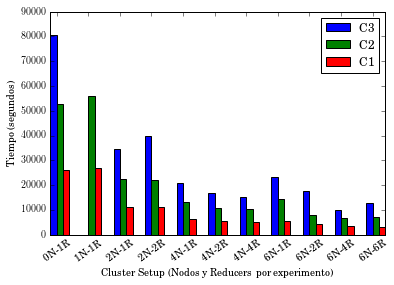

In [37]:
for experimento, dataset in dsTiempos.items():
    if dataset:
        print(experimento)
        graficarDatasetBarras(dataset)

## Efectos de usar Reducers

Dataset

### 6 Nodos

| Reducers |    C1    |     C2    |     C3    |
|:--------:|:--------:|:---------:|:---------:|
|    1R    | 5546.969 | 11668.007 | 19210.043 |
|    2R    | 4041.535 | 7864.134  | 12293.151 |
|    4R    | 3409.284 | 6735.543  | 9995.482  |
|    6R    | 3158.89  | 6919.024  | 12359.091 |

In [39]:
# Datasets de tiempos por reduce: Experimentos
dsTiemposRed = {'6N': {}, '4N': {}}

# Campos comunes
#tituloPrefix = "Tiempos de Construcción de índice \n"
tituloPrefix = ""
labels = ['1R', '2R', '4R', '6R']
xlabel = "Cantidad de reducers"

## 6N
experimento = '6N'
#dsTiemposRed[experimento]['titulo'] = tituloPrefix + "6 Nodos (6N)"
dsTiemposRed[experimento]['labels'] = labels
dsTiemposRed[experimento]['legendLoc'] = legendLoc
dsTiemposRed[experimento]['xlabel'] = xlabel
dsTiemposRed[experimento]['ylabel'] = ylabel
dsTiemposRed[experimento]['series'] = {}
dsTiemposRed[experimento]['series']['C1'] = [5546.969, 4041.535, 3409.284, 3158.89]
dsTiemposRed[experimento]['series']['C2'] = [11668.007, 7864.134, 6735.543, 6919.024]
dsTiemposRed[experimento]['series']['C3'] = [19210.043, 12293.151, 9995.482, 12359.091]

6N


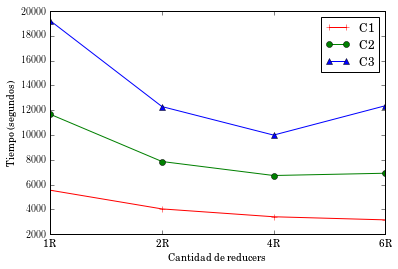

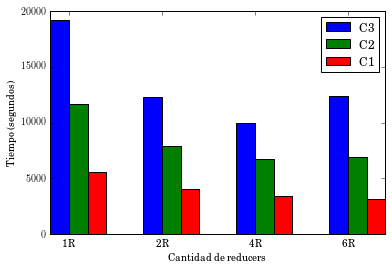

In [40]:
for experimento, dataset in dsTiemposRed.items():
    if dataset:
        print(experimento)
        graficarDataset(dataset)
        graficarDatasetBarras(dataset)

### Mejora de reducers

Se toma los mejores tiempos de los reducers para cada configuracion de nodos

In [41]:
dsReducers = {'BL-SC': {}, 'BL-CC': {}, 'BM-SC': {}, 'BM-CC': {}}

# Campos comunes
#tituloPrefix = "Tiempos de ejecucion por cantidad de nodos \n"
tituloPrefix = ""
labels = ['1 Nodo', '2 Nodos', '4 Nodos', '6 Nodos']
ejex = [1, 2, 4, 6]
legendLoc = 1
xlabel = "Cantidad de nodos"
ylabel = "Tiempo (segundos)"
rotation = 'horizontal'
labelTrendPreffix = 'Ajuste '

## BL - SC
experimento = 'BL-SC'
def f(x): return -13088.6718968037 * log(x) + 24316.7509696745 # Formulas extraidas desde lireoffice calc
def g(x): return -27125.0762447019 * log(x) + 50167.0166448059
def h(x): return -23099.0922784781 * log(x) + 49880.5025497996
#dsReducers[experimento]['titulo'] = tituloPrefix + " Baseline Sin Compresion (BL-SC)"
dsReducers[experimento]['labels'] = labels
dsReducers[experimento]['legendLoc'] = legendLoc
dsReducers[experimento]['xlabel'] = xlabel
dsReducers[experimento]['ylabel'] = ylabel
dsReducers[experimento]['rotation'] = rotation
dsReducers[experimento]['xvalues'] = ejex
dsReducers[experimento]['series'] = {}
dsReducers[experimento]['series']['C1'] = [26976.092, 11285.692, 5146.407, 3189.933]
dsReducers[experimento]['series']['C2'] = [56062.717, 22598.283, 10264.900, 6735.542]
dsReducers[experimento]['series']['C3'] = [None, 34797.463, 15343.849, 10078.964]
dsReducers[experimento]['trend'] = {}
dsReducers[experimento]['trend']['C1'] = { 'equation': f, 'label': labelTrendPreffix+'C1' }
dsReducers[experimento]['trend']['C2'] = { 'equation': g, 'label': labelTrendPreffix+'C2' }
dsReducers[experimento]['trend']['C3'] = { 'equation': h, 'label': labelTrendPreffix+'C3' }

## BL - CC
experimento = 'BL-CC'
def i(x): return -12937.6710157737 * log(x) + 24138.3265286992 # Formulas extraidas desde lireoffice calc
def j(x): return -26822.8723596723 * log(x) + 49772.3061485867
def k(x): return -22989.4641488247 * log(x) + 49647.4429509869
#dsReducers[experimento]['titulo'] = tituloPrefix + " Baseline Con Compresion (BL-CC)"
dsReducers[experimento]['labels'] = labels
dsReducers[experimento]['legendLoc'] = legendLoc
dsReducers[experimento]['xlabel'] = xlabel
dsReducers[experimento]['ylabel'] = ylabel
dsReducers[experimento]['rotation'] = rotation
dsReducers[experimento]['xvalues'] = ejex
dsReducers[experimento]['series'] = {}
dsReducers[experimento]['series']['C1'] = [26838.776, 11087.425, 5333.011, 3209.767]
dsReducers[experimento]['series']['C2'] = [55844.727, 22085.329, 10396.146, 6926.291]
dsReducers[experimento]['series']['C3'] = [None, 34612.985, 15337.024, 9995.482]
dsReducers[experimento]['trend'] = {}
dsReducers[experimento]['trend']['C1'] = { 'equation': i, 'label': labelTrendPreffix+'C1' }
dsReducers[experimento]['trend']['C2'] = { 'equation': j, 'label': labelTrendPreffix+'C2' }
dsReducers[experimento]['trend']['C3'] = { 'equation': k, 'label': labelTrendPreffix+'C3' }

## BM - SC
experimento = 'BM-SC'
def l(x): return -13142.2632267535 * log(x) + 24457.9909223115 # Formulas extraidas desde lireoffice calc
def m(x): return -27337.5648638873 * log(x) + 50561.4866841876
def n(x): return -23337.7118149268 * log(x) + 50659.9931899738
#dsReducers[experimento]['titulo'] = tituloPrefix + " BlockMax Sin Compresión (BM-SC)"
dsReducers[experimento]['labels'] = labels
dsReducers[experimento]['legendLoc'] = legendLoc
dsReducers[experimento]['xlabel'] = xlabel
dsReducers[experimento]['ylabel'] = ylabel
dsReducers[experimento]['rotation'] = rotation
dsReducers[experimento]['xvalues'] = ejex
dsReducers[experimento]['series'] = {}
dsReducers[experimento]['series']['C1'] = [27053.689, 11518.062, 5147.026, 3236.844]
dsReducers[experimento]['series']['C2'] = [56509.801, 22802.684, 10248.214, 6856.038]
dsReducers[experimento]['series']['C3'] = [None, 35429.033, 15745.184, 10460.786]
dsReducers[experimento]['trend'] = {}
dsReducers[experimento]['trend']['C1'] = { 'equation': l, 'label': labelTrendPreffix+'C1' }
dsReducers[experimento]['trend']['C2'] = { 'equation': m, 'label': labelTrendPreffix+'C2' }
dsReducers[experimento]['trend']['C3'] = { 'equation': n, 'label': labelTrendPreffix+'C3' }

## BM - CC
experimento = 'BM-CC'
def o(x): return -13116.8455426022 * log(x) + 24325.8234311186 # Formulas extraidas desde lireoffice calc
def p(x): return -27142.2397985841 * log(x) + 50290.0962866083
def q(x): return -21962.1250413717 * log(x) + 47916.9438872479
#dsReducers[experimento]['titulo'] = tituloPrefix + " BlockMax Con Compresión (BM-CC)"
dsReducers[experimento]['labels'] = labels
dsReducers[experimento]['legendLoc'] = legendLoc
dsReducers[experimento]['xlabel'] = xlabel
dsReducers[experimento]['ylabel'] = ylabel
dsReducers[experimento]['rotation'] = rotation
dsReducers[experimento]['xvalues'] = ejex
dsReducers[experimento]['series'] = {}
dsReducers[experimento]['series']['C1'] = [27073.787, 11104.052, 5188.618, 3158.890]
dsReducers[experimento]['series']['C2'] = [56189.978, 22751.221, 10232.566, 6913.552]
dsReducers[experimento]['series']['C3'] = [None, 33558.135, 15129.476, 10043.418]
dsReducers[experimento]['trend'] = {}
dsReducers[experimento]['trend']['C1'] = { 'equation': o, 'label': labelTrendPreffix+'C1' }
dsReducers[experimento]['trend']['C2'] = { 'equation': p, 'label': labelTrendPreffix+'C2' }
dsReducers[experimento]['trend']['C3'] = { 'equation': q, 'label': labelTrendPreffix+'C3' }

BM-CC


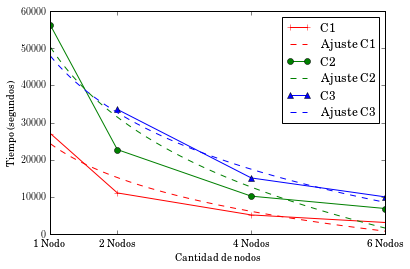

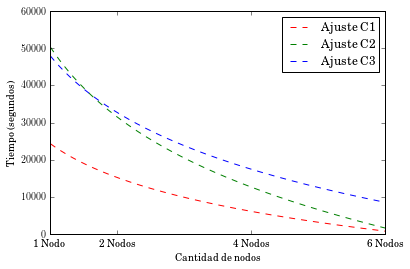

BL-SC


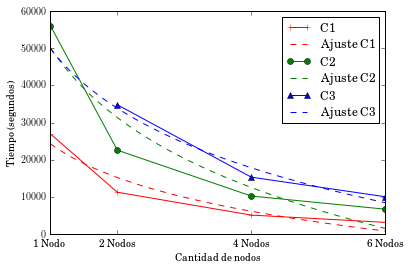

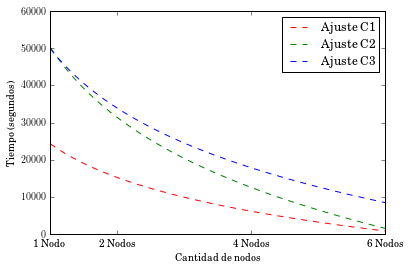

BM-SC


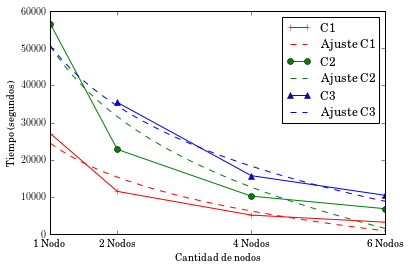

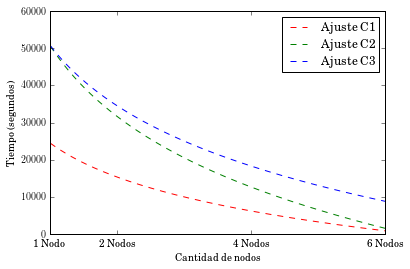

BL-CC


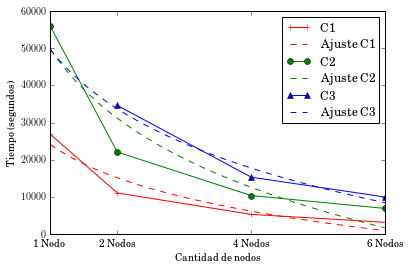

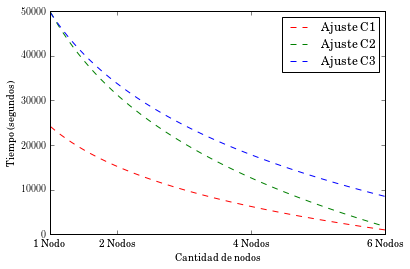

In [42]:
for experimento, dataset in dsReducers.items():
    if dataset:
        print(experimento)
        graficarDataset(dataset)
        graficarDataset(dataset, onlyTrend=True)

## Graficos de Speedups

Los graficos de speedups se grafican a continuación

In [43]:
# Datasets de speedup:
dsSpeedUp = {'BL-SC': {}, 'BL-CC': {}, 'BM-SC': {}, 'BM-CC': {}}

# Campos comunes
tituloPrefix = "Speedup \n"
labels = ['3 Núcleos', '6 Núcleos', '12 Núcleos', '18 Núcleos']
ejex = [3, 6, 12, 18]
legendLoc = 2
xlabel = "Cantidad de Núcleos"
ylabel = "Speedup"
rotation = 'horizontal'
seriex = 'Lineal'

## BL - SC
experimento = 'BL-SC'
#dsSpeedUp[experimento]['titulo'] = tituloPrefix + " Baseline Sin Compresion (BL-SC)"
dsSpeedUp[experimento]['labels'] = labels
dsSpeedUp[experimento]['legendLoc'] = legendLoc
dsSpeedUp[experimento]['xlabel'] = xlabel
dsSpeedUp[experimento]['ylabel'] = ylabel
dsSpeedUp[experimento]['rotation'] = rotation
dsSpeedUp[experimento]['seriex'] = seriex
dsSpeedUp[experimento]['series'] = {}
dsSpeedUp[experimento]['series']['Lineal'] = ejex
dsSpeedUp[experimento]['series']['C1'] = [0.969, 2.316, 5.079, 8.194]
dsSpeedUp[experimento]['series']['C2'] = [0.951, 2.360, 5.195, 7.917]
dsSpeedUp[experimento]['series']['C3'] = [None, 2.305, 5.227, 7.958]

## BL - CC
experimento = 'BL-CC'
#dsSpeedUp[experimento]['titulo'] = tituloPrefix + " Baseline con Compresion (BL-CC)"
dsSpeedUp[experimento]['labels'] = labels
dsSpeedUp[experimento]['legendLoc'] = legendLoc
dsSpeedUp[experimento]['xlabel'] = xlabel
dsSpeedUp[experimento]['ylabel'] = ylabel
dsSpeedUp[experimento]['rotation'] = rotation
dsSpeedUp[experimento]['seriex'] = seriex
dsSpeedUp[experimento]['series'] = {}
dsSpeedUp[experimento]['series']['Lineal'] = ejex
dsSpeedUp[experimento]['series']['C1'] = [0.969, 2.346, 4.877, 8.104]
dsSpeedUp[experimento]['series']['C2'] = [0.948, 2.398, 5.093, 7.645]
dsSpeedUp[experimento]['series']['C3'] = [None, 2.326, 5.249, 8.054]

## BM - SC
experimento = 'BM-SC'
#dsSpeedUp[experimento]['titulo'] = tituloPrefix + " BlockMax sin Compresion (BM-SC)"
dsSpeedUp[experimento]['labels'] = labels
dsSpeedUp[experimento]['legendLoc'] = legendLoc
dsSpeedUp[experimento]['xlabel'] = xlabel
dsSpeedUp[experimento]['ylabel'] = ylabel
dsSpeedUp[experimento]['rotation'] = rotation
dsSpeedUp[experimento]['seriex'] = seriex
dsSpeedUp[experimento]['series'] = {}
dsSpeedUp[experimento]['series']['Lineal'] = ejex
dsSpeedUp[experimento]['series']['C1'] = [0.975, 2.289, 5.123, 8.146]
dsSpeedUp[experimento]['series']['C2'] = [0.943, 2.337, 5.200, 7.773]
dsSpeedUp[experimento]['series']['C3'] = [None, 2.288, 5.148, 7.749]

## BM - CC
experimento = 'BM-CC'
#dsSpeedUp[experimento]['titulo'] = tituloPrefix + " BlockMax sin Compresion (BM-CC)"
dsSpeedUp[experimento]['labels'] = labels
dsSpeedUp[experimento]['legendLoc'] = legendLoc
dsSpeedUp[experimento]['xlabel'] = xlabel
dsSpeedUp[experimento]['ylabel'] = ylabel
dsSpeedUp[experimento]['rotation'] = rotation
dsSpeedUp[experimento]['seriex'] = seriex
dsSpeedUp[experimento]['series'] = {}
dsSpeedUp[experimento]['series']['Lineal'] = ejex
dsSpeedUp[experimento]['series']['C1'] = [0.978, 2.385, 5.105, 8.385]
dsSpeedUp[experimento]['series']['C2'] = [0.944, 2.332, 5.184, 7.673]
dsSpeedUp[experimento]['series']['C3'] = [None, 2.464, 5.466, 8.235]

BM-CC


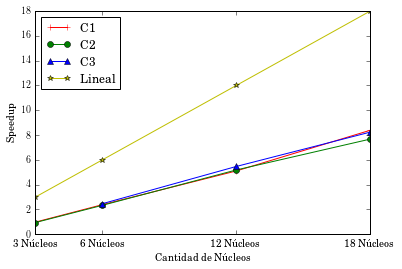

BL-SC


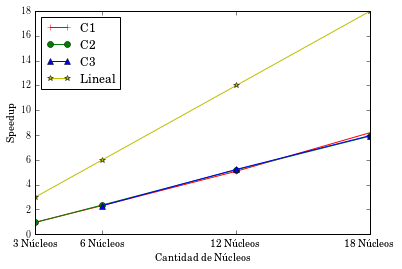

BM-SC


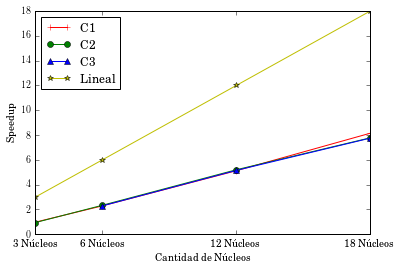

BL-CC


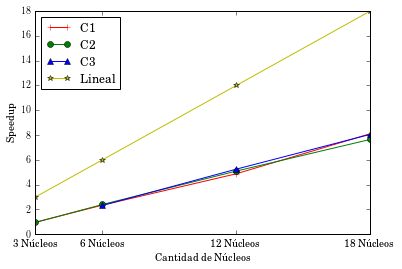

In [44]:
for experimento, dataset in dsSpeedUp.items():
    if dataset:
        print(experimento)
        graficarDataset(dataset)

## Graficos de eficiencia

La eficiencia se calcula a partir del speedup. Luego se arman los graficos

In [46]:
# Datasets de speedup:
dsEficiencia = {'BL-SC': {}, 'BL-CC': {}, 'BM-SC': {}, 'BM-CC': {}, 'C3': {}}

# Campos comunes
tituloPrefix = "Eficiencia \n"
labels = ['3 Cores', '6 Cores', '12 Cores', '18 Cores']
legendLoc = 2
xlabel = "Cantidad de cores"
ylabel = "Eficiencia"
rotation = 'horizontal'
ylim = [0.3, 0.47]

## BL - SC
experimento = 'BL-SC'
#dsEficiencia[experimento]['titulo'] = tituloPrefix + " Baseline Sin Compresion (BL-SC)"
dsEficiencia[experimento]['labels'] = labels
dsEficiencia[experimento]['legendLoc'] = legendLoc
dsEficiencia[experimento]['xlabel'] = xlabel
dsEficiencia[experimento]['ylabel'] = ylabel
dsEficiencia[experimento]['ylim'] = ylim
dsEficiencia[experimento]['rotation'] = rotation
dsEficiencia[experimento]['series'] = {}
dsEficiencia[experimento]['series']['C1'] = [0.323, 0.386, 0.423, 0.455]
dsEficiencia[experimento]['series']['C2'] = [0.317, 0.393, 0.433, 0.440]
dsEficiencia[experimento]['series']['C3'] = [None, 0.384, 0.436, 0.442]

## BL - CC
experimento = 'BL-CC'
#dsEficiencia[experimento]['titulo'] = tituloPrefix + " Baseline con Compresion (BL-CC)"
dsEficiencia[experimento]['labels'] = labels
dsEficiencia[experimento]['legendLoc'] = legendLoc
dsEficiencia[experimento]['xlabel'] = xlabel
dsEficiencia[experimento]['ylabel'] = ylabel
dsEficiencia[experimento]['ylim'] = ylim
dsEficiencia[experimento]['rotation'] = rotation
dsEficiencia[experimento]['series'] = {}
dsEficiencia[experimento]['series']['C1'] = [0.323, 0.391, 0.406, 0.450]
dsEficiencia[experimento]['series']['C2'] = [0.316, 0.400, 0.424, 0.425]
dsEficiencia[experimento]['series']['C3'] = [None, 0.388, 0.437, 0.447]

## BM - SC
experimento = 'BM-SC'
#dsEficiencia[experimento]['titulo'] = tituloPrefix + " Block-Max Sin Compresion (BM-SC)"
dsEficiencia[experimento]['labels'] = labels
dsEficiencia[experimento]['legendLoc'] = legendLoc
dsEficiencia[experimento]['xlabel'] = xlabel
dsEficiencia[experimento]['ylabel'] = ylabel
dsEficiencia[experimento]['ylim'] = ylim
dsEficiencia[experimento]['rotation'] = rotation
dsEficiencia[experimento]['series'] = {}
dsEficiencia[experimento]['series']['C1'] = [0.325, 0.382, 0.427, 0.453]
dsEficiencia[experimento]['series']['C2'] = [0.314, 0.390, 0.433, 0.432]
dsEficiencia[experimento]['series']['C3'] = [None, 0.381, 0.429, 0.430]

## BM - CC
experimento = 'BM-CC'
#dsEficiencia[experimento]['titulo'] = tituloPrefix + " Block-Max con Compresion (BM-CC)"
dsEficiencia[experimento]['labels'] = labels
dsEficiencia[experimento]['legendLoc'] = legendLoc
dsEficiencia[experimento]['xlabel'] = xlabel
dsEficiencia[experimento]['ylabel'] = ylabel
dsEficiencia[experimento]['ylim'] = ylim
dsEficiencia[experimento]['rotation'] = rotation
dsEficiencia[experimento]['series'] = {}
dsEficiencia[experimento]['series']['C1'] = [0.326, 0.398, 0.425, 0.466]
dsEficiencia[experimento]['series']['C2'] = [0.315, 0.389, 0.432, 0.426]
dsEficiencia[experimento]['series']['C3'] = [None, 0.411, 0.456, 0.457]

## C3
experimento = 'C3'
#dsEficiencia[experimento]['titulo'] = tituloPrefix + " Coleccion 3 (C3)"
dsEficiencia[experimento]['labels'] = labels
dsEficiencia[experimento]['legendLoc'] = 4
dsEficiencia[experimento]['xlabel'] = xlabel
dsEficiencia[experimento]['ylabel'] = ylabel
dsEficiencia[experimento]['ylim'] = ylim
dsEficiencia[experimento]['rotation'] = rotation
dsEficiencia[experimento]['series'] = {}
dsEficiencia[experimento]['series']['BL-SC'] = [None, 0.384, 0.436, 0.442]
dsEficiencia[experimento]['series']['BL-CC'] = [None, 0.388, 0.437, 0.447]
dsEficiencia[experimento]['series']['BM-SC'] = [None, 0.381, 0.429, 0.430]
dsEficiencia[experimento]['series']['BM-CC'] = [None, 0.411, 0.456, 0.457]

BM-CC


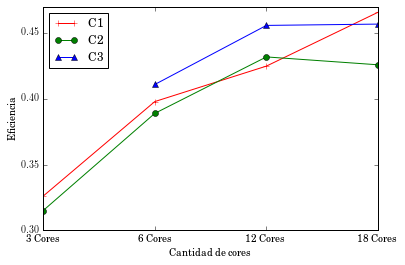

BL-SC


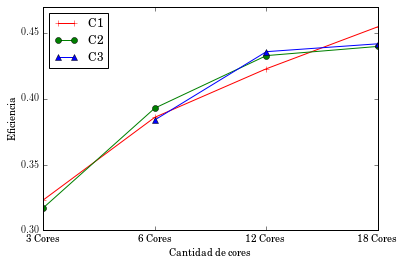

BM-SC


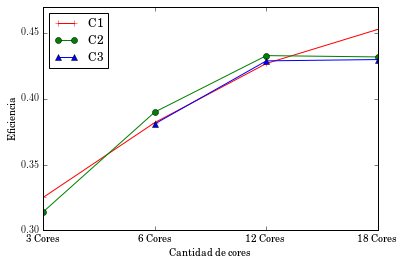

BL-CC


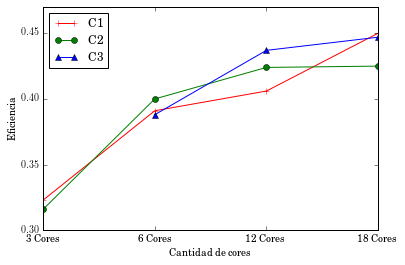

C3


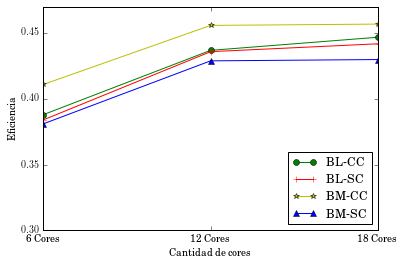

In [47]:
for experimento, dataset in dsEficiencia.items():
    if dataset:
        print(experimento)
        graficarDataset(dataset)

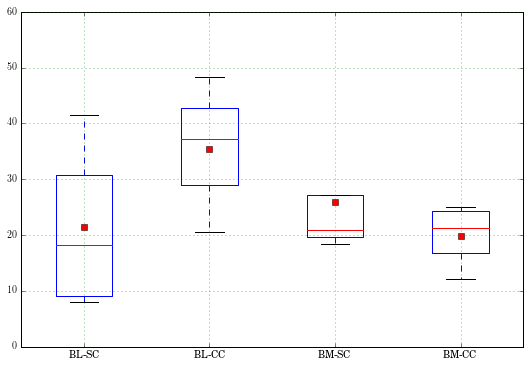

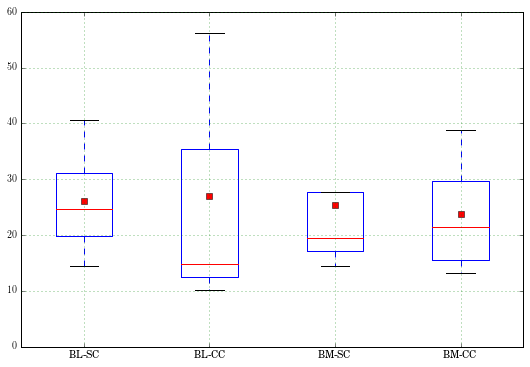

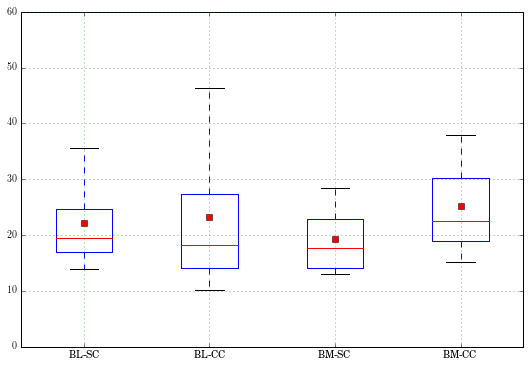

In [48]:
maxVal = 60

## Add data
### C1
data1 = np.array([27.053, 9.448, 8.042, 41.443])
data2 = np.array([37.197, 20.580, 48.259])
data3 = np.array([21.684, 43.378, 18.305, 19.968])
data4 = np.array([24.044, 12.073, 18.291, 24.978])

data_to_plot = [data1, data2, data3, data4]
labels = ['BL-SC', 'BL-CC', 'BM-SC', 'BM-CC']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
#fig.suptitle('Imbalance por experimento en Fase Map para C1 en una configuración de 6 Nodos', fontsize=12, fontweight='bold')

# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(color='g')
axes = plt.gca()
axes.set_ylim([0, maxVal])

# Create the boxplot
bp = ax.boxplot(data_to_plot, 0, '', labels=labels, showmeans = True, meanline = False)
plt.show()

### C2
data1 = np.array([21.560, 27.863, 14.505, 40.578])
data2 = np.array([10.142, 14.751, 56.127])
data3 = np.array([20.904, 18.081, 14.491, 48.052])
data4 = np.array([26.530, 13.185, 16.266, 38.831])

data_to_plot = [data1, data2, data3, data4]
labels = ['BL-SC', 'BL-CC', 'BM-SC', 'BM-CC']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
#fig.suptitle('Imbalance por experimento en Fase Map para C2 en una configuración de 6 Nodos', fontsize=12, fontweight='bold')

# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(color='g')
axes = plt.gca()
axes.set_ylim([0, maxVal])

# Create the boxplot
bp = ax.boxplot(data_to_plot, 0, '', labels=labels, showmeans = True, meanline = False)
plt.show()

### C3
data1 = np.array([20.900, 13.946, 17.968, 35.548])
data2 = np.array([15.444, 10.142, 20.996, 46.253])
data3 = np.array([28.463, 12.977, 14.444, 20.905])
data4 = np.array([15.153, 22.519, 37.962])

data_to_plot = [data1, data2, data3, data4]
labels = ['BL-SC', 'BL-CC', 'BM-SC', 'BM-CC']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
#fig.suptitle('Imbalance por experimento en Fase Map para C3 en una configuración de 6 Nodos', fontsize=12, fontweight='bold')

# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(color='g')
axes = plt.gca()
axes.set_ylim([0, maxVal])

# Create the boxplot
bp = ax.boxplot(data_to_plot, 0, '', labels=labels, showmeans = True, meanline = False)
plt.show()

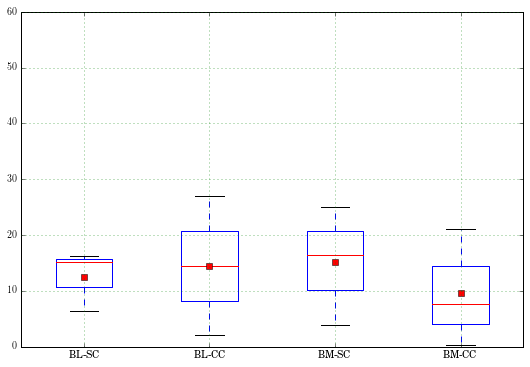

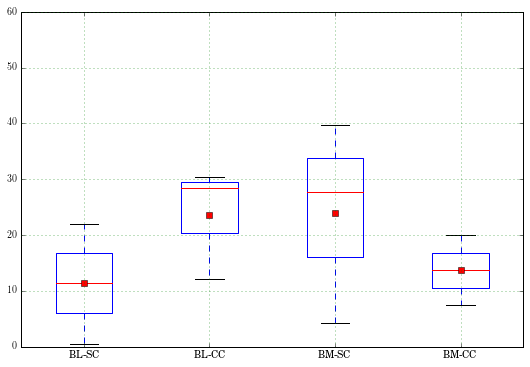

In [49]:
maxVal = 60

### C2
data1 = np.array([15.068, 6.309, 16.223])
data2 = np.array([1.998, 26.888])
data3 = np.array([3.843, 16.447, 24.938])
data4 = np.array([0.259, 21.077, 7.681])

data_to_plot = [data1, data2, data3, data4]
labels = ['BL-SC', 'BL-CC', 'BM-SC', 'BM-CC']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
#fig.suptitle('Imbalance por experimento en Fase Reduce para C2 en una configuración de 6 Nodos', fontsize=12, fontweight='bold')

# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(color='g')
axes = plt.gca()
axes.set_ylim([0, maxVal])

# Create the boxplot
bp = ax.boxplot(data_to_plot, 0, '', labels=labels, showmeans = True, meanline = False)
plt.show()

### C3
data1 = np.array([0.487, 11.472, 21.951])
data2 = np.array([30.378, 12.092, 28.462])
data3 = np.array([27.653, 4.300, 39.750])
data4 = np.array([7.367, 19.990])

data_to_plot = [data1, data2, data3, data4]
labels = ['BL-SC', 'BL-CC', 'BM-SC', 'BM-CC']

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
#fig.suptitle('Imbalance por experimento en Fase Reduce para C3 en una configuración de 6 Nodos', fontsize=12, fontweight='bold')

# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(color='g')
axes = plt.gca()
axes.set_ylim([0, maxVal])

# Create the boxplot
bp = ax.boxplot(data_to_plot, 0, '', labels=labels, showmeans = True, meanline = False)
plt.show()